The notebook contains code to do drug analysis on TCGA data. (Figure 5)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tcga_pred_df = pd.read_csv('tcga_hallmark_pred.csv', index_col=0)
tcga_pred_df = (tcga_pred_df >= 0.5).astype(int)
tcga_pred_df.index = tcga_pred_df.index.astype(str)
tcga_pred_df

,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI
TCGA-FA-8693,1,1,1,1,1,1,1,1,1,1
TCGA-FA-A4BB,1,1,1,1,1,1,1,1,1,1
TCGA-FA-A4XK,1,1,1,1,1,1,1,1,1,1
TCGA-FA-A6HN,1,1,1,1,1,1,1,1,1,1
TCGA-FA-A6HO,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
TCGA-AB-3007,1,1,1,1,1,1,1,1,1,1
TCGA-AB-3008,1,1,1,1,1,1,1,1,1,1
TCGA-AB-3009,1,1,1,1,1,1,1,1,1,1
TCGA-AB-3011,1,1,1,1,1,1,1,1,1,1


In [3]:
patient_treat = pd.read_csv('patient_treatment.csv', index_col=0)
agent_counts = patient_treat['AGENT'].value_counts()
patient_treat = patient_treat[patient_treat['AGENT'].isin(agent_counts[agent_counts >= 20].index)]
patient_treat['AGENT'] = patient_treat['AGENT'].str.replace(r'^Radiation.*$', 'Radiation', regex=True)
patient_treat = patient_treat.assign(AGENT=patient_treat['AGENT'].str.split(r'\s*\+\s*')).explode('AGENT')
patient_treat['AGENT'] = patient_treat['AGENT'].str.upper()
patient_treat = patient_treat[['AGENT']]
patient_treat = pd.get_dummies(patient_treat['AGENT'])
patient_treat = patient_treat.groupby(patient_treat.index).sum()
patient_treat = (patient_treat > 0).astype(int)
patient_treat

,ALIMTA,ANASTRAZOLE,BEVACIZUMAB,BICALUTAMIDE,BLEOMYCIN,CAPECITABINE,CARBOPLATIN,CARMUSTINE,CETUXIMAB,CISPLATIN,...,TAXOL,TAXOTERE,TEMOZOLOMIDE,TETRATHIOMOLYBDATE,TOPOTECAN,TRASTUZUMAB,VINBLASTINE,VINCRISTINE,VINORELBINE,ZOLEDRONIC ACID
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-0003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-02-0006,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-02-0007,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-02-0010,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZM-AA06,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-ZM-AA0H,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-ZN-A9VP,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
tcga_pred_after_list = []
for col1 in tcga_pred_df.columns:
    for col2 in patient_treat.columns:
        tcga_pred_after_list.append(tcga_pred_df[col1] * patient_treat[col2])
tcga_pred_after = pd.concat(tcga_pred_after_list, axis=1).dropna().astype(int)
tcga_pred_after.columns = [f'{col1}_{col2}' for col1 in tcga_pred_df.columns for col2 in patient_treat.columns]
tcga_pred_after

,AIM_ALIMTA,AIM_ANASTRAZOLE,AIM_BEVACIZUMAB,AIM_BICALUTAMIDE,AIM_BLEOMYCIN,AIM_CAPECITABINE,AIM_CARBOPLATIN,AIM_CARMUSTINE,AIM_CETUXIMAB,AIM_CISPLATIN,...,TPI_TAXOL,TPI_TAXOTERE,TPI_TEMOZOLOMIDE,TPI_TETRATHIOMOLYBDATE,TPI_TOPOTECAN,TPI_TRASTUZUMAB,TPI_VINBLASTINE,TPI_VINCRISTINE,TPI_VINORELBINE,TPI_ZOLEDRONIC ACID
TCGA-02-0055,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-02-2483,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-02-2485,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-02-2486,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-04-1348,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZG-A9LU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-ZG-A9LY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-ZG-A9LZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-ZG-A9MC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
patient_info = pd.read_csv('patient_info.csv', index_col=(0))
patient_info['OS_STATUS'] = [str(i)[0] if not pd.isnull(i) else np.nan for i in patient_info['OS_STATUS']]
patient_info['DFS_STATUS'] = [str(i)[0] if not pd.isnull(i) else np.nan for i in patient_info['DFS_STATUS']]
patient_info['PFS_STATUS'] = [str(i)[0] if not pd.isnull(i) else np.nan for i in patient_info['PFS_STATUS']]
patient_info = patient_info[['OS_STATUS']].dropna().sort_index().astype(int)  # EXTRACT DFS and PFS for the respective analysis
patient_info['OS_STATUS'] = patient_info['OS_STATUS'].apply(lambda x: 1 if x == 0 else 0)
patient_info

,OS_STATUS
PATIENT_ID,
TCGA-02-0001,0
TCGA-02-0003,0
TCGA-02-0006,0
TCGA-02-0007,0
TCGA-02-0009,0
...,...
TCGA-ZS-A9CF,1
TCGA-ZS-A9CG,1
TCGA-ZT-A8OM,1


In [6]:
common = list(set(tcga_pred_after.index) & set(patient_info.index))
len(common)

3018

In [7]:
X_train = tcga_pred_after[tcga_pred_after.index.isin(common)].sort_index()
X_train

,AIM_ALIMTA,AIM_ANASTRAZOLE,AIM_BEVACIZUMAB,AIM_BICALUTAMIDE,AIM_BLEOMYCIN,AIM_CAPECITABINE,AIM_CARBOPLATIN,AIM_CARMUSTINE,AIM_CETUXIMAB,AIM_CISPLATIN,...,TPI_TAXOL,TPI_TAXOTERE,TPI_TEMOZOLOMIDE,TPI_TETRATHIOMOLYBDATE,TPI_TOPOTECAN,TPI_TRASTUZUMAB,TPI_VINBLASTINE,TPI_VINCRISTINE,TPI_VINORELBINE,TPI_ZOLEDRONIC ACID
TCGA-02-0055,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-02-2483,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-02-2485,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-02-2486,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TCGA-04-1348,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZG-A9LU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-ZG-A9LY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-ZG-A9LZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-ZG-A9MC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train = patient_info[patient_info.index.isin(common)]
y_train

,OS_STATUS
PATIENT_ID,
TCGA-02-0055,0
TCGA-02-2483,1
TCGA-02-2485,1
TCGA-02-2486,0
TCGA-04-1348,0
...,...
TCGA-ZG-A9LU,1
TCGA-ZG-A9LY,1
TCGA-ZG-A9LZ,1


In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000).fit(X_train, y_train['OS_STATUS'])
clf

LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   random_state=0, solver='saga')

In [10]:
coef_df = pd.DataFrame([X_train.columns, np.maximum(clf.coef_, 0).ravel()]).T
coef_df = coef_df.set_index(0)
coef_df = coef_df.sort_values(by=1, ascending=True)
coef_df[['Hallmark', 'Drugs']] = pd.DataFrame(coef_df.index.str.split('_').tolist(), index=coef_df.index)[[0, 1]]
coef_df = coef_df.pivot(index='Hallmark', columns='Drugs', values=1).astype(float)
coef_df

Drugs,ALIMTA,ANASTRAZOLE,BEVACIZUMAB,BICALUTAMIDE,BLEOMYCIN,CAPECITABINE,CARBOPLATIN,CARMUSTINE,CETUXIMAB,CISPLATIN,...,TAXOL,TAXOTERE,TEMOZOLOMIDE,TETRATHIOMOLYBDATE,TOPOTECAN,TRASTUZUMAB,VINBLASTINE,VINCRISTINE,VINORELBINE,ZOLEDRONIC ACID
Hallmark,,,,,,,,,,,,,,,,,,,,,
AID,0.0,0.175077,0.000000,0.000000,0.098354,0.0,0.0,0.0,0.0,0.0,...,0.040106,0.0,0.000000,0.0,0.0,0.032599,0.0,0.000000,0.0,0.0
AIM,0.0,0.000000,0.000000,0.000000,0.098354,0.0,0.0,0.0,0.0,0.0,...,0.040106,0.0,0.474362,0.0,0.0,0.032599,0.0,0.000000,0.0,0.0
DCE,0.0,0.000000,0.000000,0.000000,0.098354,0.0,0.0,0.0,0.0,0.0,...,0.040106,0.0,0.000000,0.0,0.0,0.032599,0.0,0.000000,0.0,0.0
EGS,0.0,0.000000,0.000000,0.090096,0.098354,0.0,0.0,0.0,0.0,0.0,...,0.040106,0.0,0.434979,0.0,0.0,0.032599,0.0,0.297858,0.0,0.0
ERI,0.0,0.738608,0.000000,0.262095,0.098354,0.0,0.0,0.0,0.0,0.0,...,0.040106,0.0,0.395327,0.0,0.0,0.032599,0.0,0.000000,0.0,0.0
GIM,0.0,0.438795,0.267835,0.000000,0.098354,0.0,0.0,0.0,0.0,0.0,...,0.040106,0.0,0.000000,0.0,0.0,0.032599,0.0,0.000000,0.0,0.0
IA,0.0,0.000000,0.261087,0.000000,0.098354,0.0,0.0,0.0,0.0,0.0,...,0.040106,0.0,0.000000,0.0,0.0,0.032599,0.0,0.000000,0.0,0.0
RCD,0.0,0.000000,0.000000,0.090096,0.098354,0.0,0.0,0.0,0.0,0.0,...,0.040106,0.0,0.000000,0.0,0.0,0.877453,0.0,0.297858,0.0,0.0
SPS,0.0,0.000000,0.000000,0.000000,0.098354,0.0,0.0,0.0,0.0,0.0,...,0.040106,0.0,0.000000,0.0,0.0,0.032599,0.0,0.000000,0.0,0.0


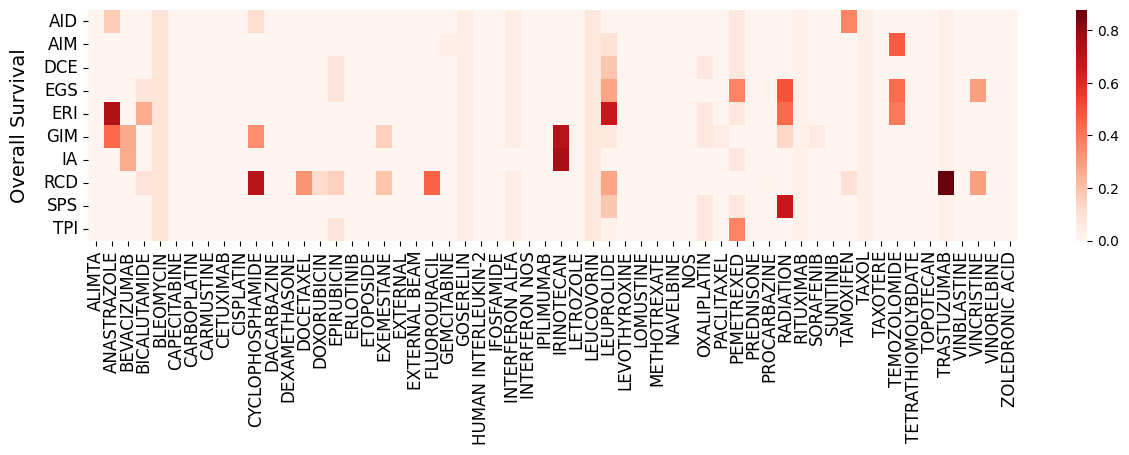

In [11]:
plt.figure(figsize=(15, 3))
sns.heatmap(coef_df, cmap='Reds')
plt.xlabel("", fontsize=16, labelpad=10)
plt.ylabel("Overall Survival", fontsize=14, labelpad=10)
plt.title("", fontsize=16, pad=15)
plt.xticks(fontsize=12)
# plt.xticks([])
plt.yticks(fontsize=12, rotation=0)
# plt.tight_layout(pad=2)
plt.savefig('tcga_os_drugs.png', dpi=1200, bbox_inches='tight')
plt.show()